# Assignment 2: Secondary Data
The objective of this assignment is to give you experience with working with secondary data.  This notebook defaults to Python 3, as R is ill-suited to string manipulaiton, which is especially important for Task 6.  Some cells can be run in R, however, as shown in Task 5.

*Note: It may be useful to read through the whole file before starting with the tasks.*

## Filtering to find competitors
**Task 1:** Write a function `filter_products_raw` that takes one argument (`key_phrase`) and returns a list of strings; these strings should be all the lines in the `/data/Assignment-2/products.json` file which contain the specified key phrase.

In [1]:
import json
data = open("/data/Assignment-2/products.json","r")
file = data.readlines()

In [12]:
def filter_products_raw(key_phrase):
    string=list()
    for x in file:
        if key_phrase in x:
            string.append(x)
    return string

**Task 2:** Using the function you just wrote, try filtering the products in `products.json` by different key words or phrases.  Print out the total number of products that match the key phrase.  Also print out the first three products that match the key phrase.  Use this technique to find a collection of products that would be in competition with the product your team is exploring.

In [56]:
print("Total number of products with 'ipad': "+ str(len(filter_products_raw('smartpen'))))

Total number of products with 'ipad': 15


In [70]:
print(filter_products_raw('smartpen'))

['{\'asin\': \'B001AAOZHI\', \'categories\': [[\'Electronics\', \'Portable Audio & Video\', \'Digital Voice Recorders\']], \'description\': \'From the ManufacturerCapture EverythingThe Pulse smartpen records audio and links it to what you write. Missed something? Tap on your notesNo Need to Lug the LaptopThe Pulse smartpen automatically captures everything as you write and draw. Transfer your notes to your computer, organize them, and even search for words within your notes. Find what you want in seconds.Share Your NotesTransform your notes and audio into interactive movies. Upload your creations online for everyone to see, hear and play.What You GetThe Pulse smartpen (1.3 ounces, anodized aluminum housing)1 GB of memory (actual user available memory will be less)Livescribe Desktop software (download)3-D Recording Headset100 sheet dot paper college-ruled notebookUSB mobile charging cradleSmartpen case2 black fine point ink cartridgesDemo card and interactive stickersInteractive Getting

**Task 3:** With the `filter_products_raw` function as a starting point, create a new function `filter_products_df` that returns a pandas data frame with two columns: `product.id` and `price`.  

*Hints:*

*1) The product id isn't called that; you need to figure out what it's called in the documentation.*

*2) The json data files aren't proper json for multiple reasons; consider using the `demjson` library.*

*3) You may need to ignore products for which prices are missing.*

In [80]:
import demjson
import pandas as pd
import numpy as np
def filter_products_df(key_phrase):
    df = pd.DataFrame({"product.id": [],"price":[]})
    raw = filter_products_raw(key_phrase)
    for line in raw:
        if line.count('price') > 0 :
            products = demjson.decode(line)
            d = pd.DataFrame({"product.id": products.get('asin') ,"price": products.get('price')},index=[0])
            df = df.append(d, ignore_index=True)
    return df

**Task 4:** Using the new `filter_products_df` function, filter the products by the key phrase you identified in Task 2, resulting in a data frame of product ids with their corresponding prices; call this data frame variable `products`.

In [81]:
products=filter_products_df('smartpen')
products

,product.id,price
0,B001AAOZHI,289.99
1,B001AAN4PW,289.99
2,B0039MZBFK,117.57
3,B003TO56FI,19.50
4,B003UNL14S,199.63
5,B004MF1E7M,4.47
6,B0053UEMHO,4.47
7,B0055UIJHG,4.47
8,B005A0B6KS,4.47
9,B007JUS330,19.59


**Task 5:** Plot the distribution of prices for products matching your query using the code provided in the following three cells.

In [82]:
# Set up R
import rpy2.ipython
%reload_ext rpy2.ipython

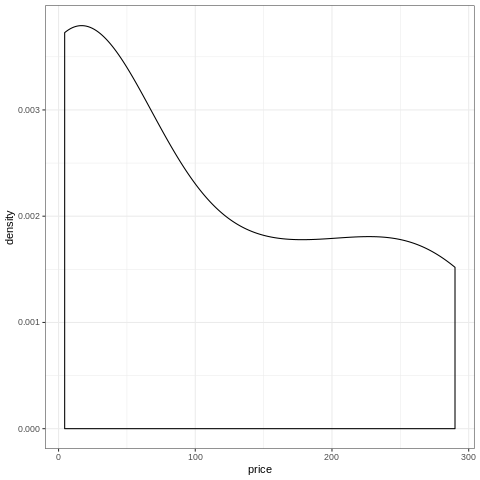

In [83]:
%%R -i products
library(ggplot2)
ggplot(products, aes(x=price)) + geom_density() + theme_bw()

In [84]:
%%R
ggsave("price_histogram.jpeg", width=6.5, height=3)

## Filtering competitor reviews
**Task 6:** Write a function called `filter_reviews` to help you find all the reviews that match the products which match your key phrase query.  This function should take a `products` argument and return a data frame with one review per row and three columns: `product.id`, `rating` (on the 5-star scale), and `review` (text).

*Hints:*

*1) There are lots of really inefficient ways to do this.  If running this function takes more than two minutes, you're doing something wrong.*

*2) I recommend testing things out on data subsamples so that you're sure of the efficiency of your code.  (For example, you can return after the first matching review).*

*3) Decoding the json on each line isn't really necessary; try doing it only for the reviews that match your product list.*

*4) String manipulation with `split` is powerful.*

In [85]:
from demjson import decode
def filter_reviews(products):
    df = pd.DataFrame({"product.id": [], "rating": [], "review": []})
    f = open("/data/Assignment-2/reviews.json")
    prods = set(products["product.id"])
    for line in f:
        id = line.split(':')[2].split(',')[0].strip().strip('"')
        if id in prods:
            review = decode(line.strip())
            d = pd.DataFrame({"product.id": [review['asin']], \
                              "rating": [review['overall']], \
                              "review": [review['reviewText']]})
            df = df.append(d, ignore_index=True)
    return df

Now filter reviews by the produts of interest found in Task 4.

In [86]:
reviews = filter_reviews(products)
reviews

,product.id,rating,review
0,B001AAN4PW,5.0,I picked this up for the wife as I have one al...
1,B001AAN4PW,5.0,So I've been using my Pulse for about six mont...
2,B001AAN4PW,5.0,For college students unable or unwilling to lu...
3,B001AAN4PW,1.0,Please be advised that items from Livescribe h...
4,B001AAN4PW,2.0,When I run the desktop manager on my windows v...
...,...,...,...
339,B00GKINXUU,1.0,If you have to work in professional office env...
340,B00GKINXUU,1.0,I purchased an 8 count re-fill medium blue pac...
341,B00GKINXUU,2.0,I chose this rating because this item seems to...
342,B00GKINXUU,1.0,Have tried both black and blue ink refills fro...


In [91]:
type(reviews)

pandas.core.frame.DataFrame

**Task 7:** Summarize the reviews into a data frame called `review_summaries` with three columns: `product.id`, `count` for the number of reviews, and `ave.rating` for the mean rating.

In [98]:
review_summaries = reviews.groupby(['product.id']).agg(['count', 'mean']).round(1)
review_summaries.columns = ['count', 'avg.rating']
review_summaries_reset = review_summaries.reset_index()
print(review_summaries_reset)

    product.id  count  avg.rating
0   B001AAN4PW    146         3.9
1   B001AAOZHI     88         4.2
2   B0039MZBFK      6         4.0
3   B003TO56FI     38         3.5
4   B003UNL14S     12         4.2
5   B004MF1E7M      2         2.0
6   B0053UEMHO      1         5.0
7   B0055UIJHG      1         5.0
8   B005A0B6KS      9         3.2
9   B007JUS330     27         4.1
10  B00CGTLOVW      1         1.0
11  B00CVTL3BS      1         1.0
12  B00CX49V38      1         1.0
13  B00GKINXTG      5         3.6
14  B00GKINXUU      6         2.3


In [117]:
print (pd.merge(review_summaries,products, on='product.id'))

     product.id  count  avg.rating   price
0    B003URNQ2Y      1         1.0   19.99
1    B0040GZJC4      1         4.0    1.99
2    B0040VUVOU      2         2.0    1.99
3    B004GAHXVO    112         2.8    3.06
4    B004HNEPHU    103         4.2   24.99
..          ...    ...         ...     ...
168  B00IR7ZD9Q      1         4.0  213.50
169  B00ITHBVTA      1         5.0    5.99
170  B00J2NB31G      5         5.0   19.99
171  B00J7V2ZL0      5         3.6    6.99
172  B00J7VYMW0      1         5.0    6.99

[173 rows x 4 columns]


**Task 8:** Merge `review_summaries` with `products` on the `product.id` variable.

In [45]:
result = pd.merge(products,
                 review_summaries[['count', 'avg.rating']],
                 on='product.id')
result

,product.id,price,count,avg.rating
0,B003URNQ2Y,19.99,1,1.0
1,B0040GZJC4,1.99,1,4.0
2,B0040VUVOU,1.99,2,2.0
3,B004GAHXVO,3.06,112,2.8
4,B004HNEPHU,24.99,103,4.2
...,...,...,...,...
168,B00ITHBVTA,5.99,1,5.0
169,B00J2NB31G,19.99,5,5.0
170,B00J7VYMW0,6.99,1,5.0
171,B00J7V2ZL0,6.99,5,3.6


**Task 9:** Using `ggplot`, Plot a scatterplot of the review summaries with price on the x-axis, the average rating on the y axis, and the size of each point being the number of reviews.  Add labels for the product ids, but fix the label size to be the same for all products.

*Hints:*

*1) You'll want to start the cell with `%%R -i review_summaries`.*

*2) You may want to use `scale_size_continuous(range = c(0.1,10)) + geom_text(size=1)` or similar.*

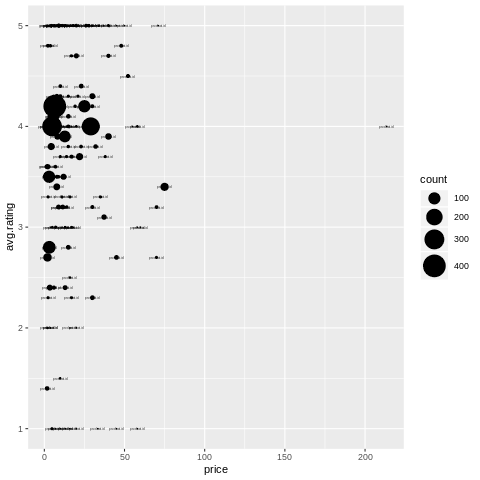

In [43]:
%%R -i result
library(ggplot2)
ggplot(result,aes(x=price,y=avg.rating, size = count))+
       geom_point()+
        scale_size_continuous(range = c(0.1,10)) + geom_text(label='product.id',size=1)

In [ ]:
%%R -i review_summaries2
library(ggplot2)
ggplot(review_summaries2, aes(x=price, y=ave.rating, size = count, label = product.id)) + 
geom_point()  + scale_size_continuous(range = c(0.1, 10)) + geom_text(aes(label = product.id), size=1)

In [ ]:
ggsave("reviews_summary.pdf", width=6.5, height=4)

**Task 10:** Write function `filter_products_by_id` that takes in a product identifier argument `idx` and returns returns the matching product information from `/data/Assignment-2/products.json`.

import demjson
def filter_products_by_id(idx):
    info=[]
    for x in file:
        products = demjson.decode(x)
        if products['asin'] == idx:
            info = info.append(x)
    return info

In [78]:
import demjson
def filter_products_by_id(idx):
    info = []
    for lines in file:
        products = demjson.decode(lines)
        if idx==products['asin']:
            info.append(lines)
    return info

In [79]:
print(filter_products_by_id('B003UNL14S'))

["{'asin': 'B003UNL14S', 'description': 'Capture Everything: The Echo smartpen records audio and links it what you write. Missed something Tap on your notes or drawings with the tip of your Pulse smartpen to hear what was said while you were writing.No Need to Lug the LaptopThe Echo smartpen automatically captures everything as you write and draw. Transfer your notes to your computer, organize them, and even search for words within your notes. Find what you want in seconds.Share Your NotesTransform your notes and audio into interactive movies. Upload your creations online for everyone to see, hear and play.What You Get. The Echo smartpen. 8 GB of memory (actual user available memory will be less). Livescribe Desktop software (download). 50 sheet dot paper lined notebook. Micro USB Cable. 2 Pen Caps. Black Fine Point Ink Cartridge Refill. Interactive Getting Started Guide. Tips & Tricks GuideWhat You Need. Windows XP 32-bit SP2 or higher, Windows Vista 32 or 64-bit operating system, or 

**Task 11:** Using the plot form Task 9, the `filter_products_by_id` function, and the `review_summaries` data frame, identify 3 competitor products and extract the relevant information required for the assignment write-up.

**Task 12:** Filter the `reviews` data frame for each of the products so that you may read the corresponding reviews.

*Hint: You may wish to save the filtered sets of reviews to separate files with the `to_csv` using the argument `sep='\t'`.  Then you can download these file to make the reviews easier to read.  You can also read the reviews right here, too!*

In [94]:
data = {'product.id':['B001AAN4PW', 'B003UNL14S', 'B0039MZBFK']}
competitors = pd.DataFrame(data)
competitors

,product.id
0,B001AAN4PW
1,B003UNL14S
2,B0039MZBFK


In [96]:
Competitor = filter_reviews(competitors)
Competitor.to_csv('competitors.csv',sep='\t')